<a href="https://colab.research.google.com/github/Alexanderputz11/Projects/blob/main/dementia_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Before you are able to analyze any data in Python, you must first import various tools that enable the user to perform various analyses and create visualizations.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

Next we will create a string to import the dataset from Google Drive directly into Colab.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Next, a string is used to locate the dataset in google drive.

In [ ]:
dementia = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/dementia_dataset.csv')

.info() is used to provide a list of columns with the corresponding number of values and data types:

In [ ]:
dementia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


.shape is used to show us the dimensions of the dataset. We see it contains 373 rows and 15 columns.

In [ ]:
dementia.shape

(373, 15)

Here dementia.describe() is used to look at the descriptive statistics within each column in our dataset. Which helps us to determine averages, ranges, and potential outliers for each category.

In [ ]:
dementia.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


Here, dementia.isnull().sum is used to show the count of null values in each column of the dataset. SES has 19 nulls and MMSE has 2 nulls.

In [ ]:
dementia.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

The nulls in SES need to be dealt with. Here .fillna is used to replace nulls with 0.

In [ ]:
dementia['SES'].fillna(0)

0      2.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
368    1.0
369    1.0
370    2.0
371    2.0
372    2.0
Name: SES, Length: 373, dtype: float64

Now the same thing has to be done with MMSE

In [ ]:
dementia['MMSE'].fillna(0)

0      27.0
1      30.0
2      23.0
3      28.0
4      22.0
       ... 
368    28.0
369    26.0
370    30.0
371    30.0
372    30.0
Name: MMSE, Length: 373, dtype: float64

Here the variable M/F is being renamed to biological "Sex" for clarity.

In [ ]:
dementia = dementia.rename(columns = {'M/F' : 'Sex'})

Below there is a heatmap to look at the relationship between various variables in the dataset. CDR is a Clinical Dementia Rating, which tells someone the severity level of dementia. Looking at the different variables we see MMSE has a moderate negative correlation with CDR. Education,SES, and nWBV all have a mild negative correlations.

<ipython-input-39-945f0ac79e68>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dementia.corr(), annot = True, cmap = 'OrRd')


<Axes: >

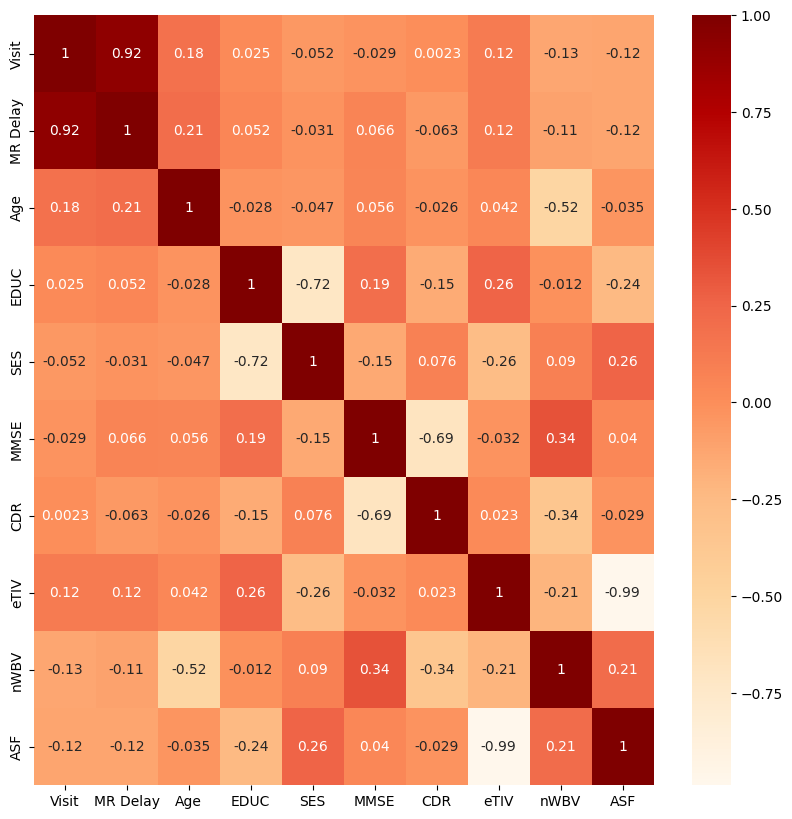

In [ ]:
plt.figure(figsize = (10,10))
sns.heatmap(dementia.corr(), annot = True, cmap = 'OrRd')

Next a variable will be created to include all participants with a CDR indicating some level of dementia.


In [ ]:
df1=dementia[(dementia['CDR'] == .5)|(dementia['CDR'] == 1)|(dementia['CDR'] == 2)]
df1

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,OAS2_0184,OAS2_0184_MR1,Demented,1,0,F,R,72,16,3.0,24.0,0.5,1354,0.733,1.296
366,OAS2_0184,OAS2_0184_MR2,Demented,2,553,F,R,73,16,3.0,21.0,1.0,1351,0.708,1.299
367,OAS2_0185,OAS2_0185_MR1,Demented,1,0,M,R,80,16,1.0,28.0,0.5,1704,0.711,1.030
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037


Now we will determine values where the person was not diagnosed with dementia.

In [ ]:
df2=dementia[dementia['CDR'] == 0]
df2

,Subject ID,MRI ID,Group,Visit,MR Delay,Gender,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,OAS2_0183,OAS2_0183_MR3,Nondemented,3,732,F,R,68,13,2.0,30.0,0.0,1506,0.740,1.165
364,OAS2_0183,OAS2_0183_MR4,Nondemented,4,2107,F,R,72,13,2.0,30.0,0.0,1510,0.723,1.162
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Import scipy to allow us to run the t-test

In [ ]:
from scipy import stats as stats

Run our t-test checking if the difference between MMSE scores significantly impacted dementia outcomes.

In [ ]:
stats.ttest_ind(df1['MMSE'], df2['MMSE'], nan_policy='omit')

Ttest_indResult(statistic=-13.374325541581296, pvalue=1.5445513864984107e-33)

Since we have a p-value significantly less than .05, we can determine there is a statistically significant relationship between MMSE and Dementia.

Now we will calculate the sample size, mean, and variance of each sample, so we can determine the standard error.

In [ ]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['MMSE'].mean()
sample_2_mean = df2['MMSE'].mean()
sample_1_var = df1['MMSE'].var()
sample_2_var = df2['MMSE'].var()


Now with this information, we can calculate standard error.

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['MMSE'],df2['MMSE'])

'The difference in means at the 95% confidence interval (two-tail) is between 3.5469867585391524 and 4.911736395329637.'

we have met the confidence interval which shows that the results for MSSE would likely be a good predictor of dementia if we repeated this study.

Next we will create a visualization to illustrate the distribution of data. Here we see that people without dementia reliably scored higher on the MMSE while those with dementia had lower scores across severity levels.

<Axes: xlabel='CDR', ylabel='MMSE'>

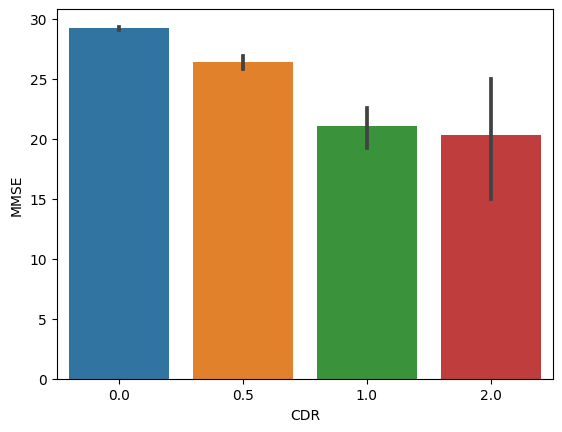

In [ ]:
sns.barplot(x="CDR", y="MMSE", data=dementia)

Next using the variables we already created, we will be running a t-test for age.

In [ ]:
stats.ttest_ind(df1['Age'], df2['Age'], nan_policy='omit')

Ttest_indResult(statistic=-0.3979968519735993, pvalue=0.6908614250349431)

The results of this study show that there is a negative correlation between age and dementia, but it however, since the pvalue is higher than .05 this correlation is not statistically significant.

Now we have to determine the confidence interval, so first we repeat the formula from earlier, but replace MMSE with Age.

In [ ]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['Age'].mean()
sample_2_mean = df2['Age'].mean()
sample_1_var = df1['Age'].var()
sample_2_var = df2['Age'].var()

Now we do the same with our confidence interval formula.

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['Age'],df2['Age'])

'The difference in means at the 95% confidence interval (two-tail) is between -1.2223929468103973 and 1.85642585187406.'

we have met the confidence interval which shows that the results for Age would likely be not be a good predictor for dementia if we repeated the study with a similar sample.

Next we will create a visualization for our data. Here we see that age is relatively consist across the no dementia and mild dementia categories. With a slight increase when severity increase in moderate dementia, that is not statistically significant.

<Axes: xlabel='CDR', ylabel='Age'>

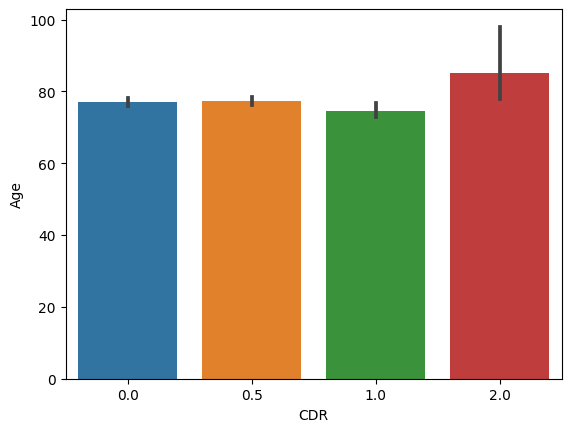

In [ ]:
sns.barplot(x="CDR", y="Age", data=dementia)

Next we will be running a t-test to determine if there is a significant difference between social economic status (SES)

In [ ]:
stats.ttest_ind(df1['SES'], df2['SES'], nan_policy='omit')

Ttest_indResult(statistic=2.4743631917211237, pvalue=0.013818109820460904)

Since we have a pvalue less than .05, we can determine there is a significant correlation between SES and Dementia.

Now we repeat to get our confidence interval. Where we had Age we will replace it with SES, in both formulas.

In [ ]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['SES'].mean()
sample_2_mean = df2['SES'].mean()
sample_1_var = df1['SES'].var()
sample_2_var = df2['SES'].var()

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['SES'],df2['SES'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.5347522072160116 and -0.06561515043289923.'

we have met the confidence interval which shows that the results for SES would likely be a good predictor of dementia.

Below we have created a boxplot to visualize the data. Looking at the distribution of data we see a significant drop in SES at the moderately severe CDR.

<Axes: xlabel='CDR', ylabel='SES'>

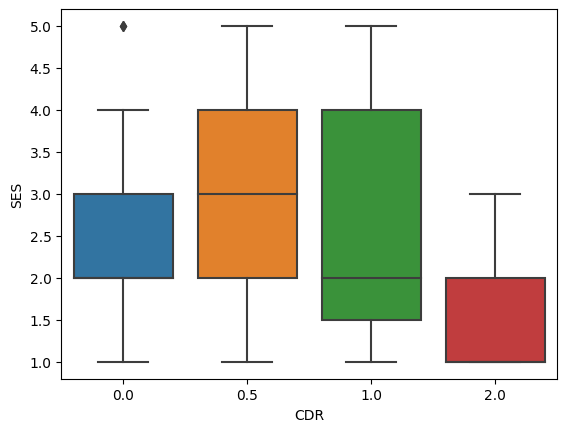

In [ ]:
sns.boxplot(x="CDR", y="SES", data=dementia)

Here we will run a t-test based on the amplitude of the person's brainwaves in response to stimuli, in regards to a dementia diagnosis.

In [ ]:
stats.ttest_ind(df1['ASF'], df2['ASF'], nan_policy='omit')

Ttest_indResult(statistic=-0.25530411526399777, pvalue=0.7986296965719835)

Here we see that ASF was not significantly correlated with a dementia diagnosis.

In [ ]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['ASF'].mean()
sample_2_mean = df2['ASF'].mean()
sample_1_var = df1['ASF'].var()
sample_2_var = df2['ASF'].var()

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['ASF'],df2['ASF'])

'The difference in means at the 95% confidence interval (two-tail) is between -0.024431378503532015 and 0.03178269528743989.'

we have met the confidence interval which shows that the results for ASF would likely not be a good predictor of dementia if we repeated this study with a similar sample.

Now we will create a visualization using a barplot. As we can see in the graph, ASF is consistent across CDR, which would mean it is not a good predictor of dementia.

<Axes: xlabel='CDR', ylabel='ASF'>

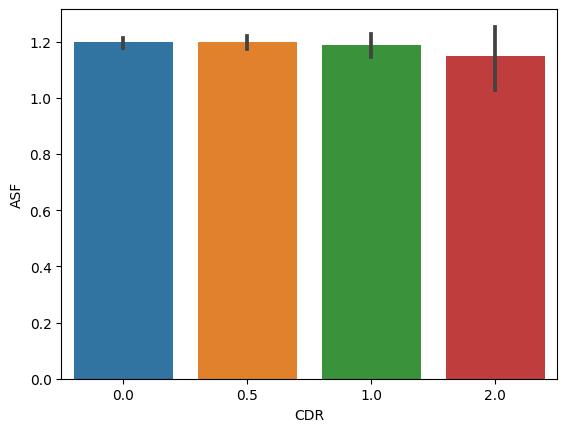

In [ ]:
sns.barplot(x="CDR", y="ASF", data=dementia)

Next, we will run a t-test to determine whether education level significantly correlates with a dementia diagnosis.

In [ ]:
stats.ttest_ind(df1['EDUC'], df2['EDUC'], nan_policy='omit')

Ttest_indResult(statistic=-4.290614995214906, pvalue=2.2760808336946914e-05)

Since our p-value is above .05, we can determine that education level did not significantly effect the liklihood of a dementia diagnosis.

In [ ]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['EDUC'].mean()
sample_2_mean = df2['EDUC'].mean()
sample_1_var = df1['EDUC'].var()
sample_2_var = df2['EDUC'].var()

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['EDUC'],df2['EDUC'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.6772694064785749 and 1.834735709503055.'

Again, we have met the confidence interval which informs us that the results for education would likely be similar if we repeated this study.  

Now we will create a graph to visualize this data. In this graph we see that our sample remained consistent when looking at CDR and years of EDUC. There is a greater variability in the moderately severe range, but it is not statistically significant.

<Axes: xlabel='CDR', ylabel='EDUC'>

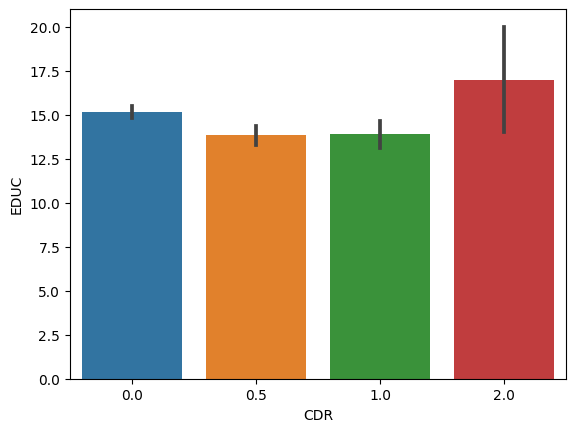

In [ ]:
sns.barplot(x="CDR", y="EDUC", data=dementia)

Finally we will look at normalized whole brain volumes and Clinical Dementia Rating.

In [ ]:
stats.ttest_ind(df1['nWBV'], df2['nWBV'], nan_policy='omit')

Ttest_indResult(statistic=-6.640510443313793, pvalue=1.1136916838404847e-10)

This reveals a statistically significant negative correlation between nWBV and CDR. Next we will determine if it meets our confidence interval.

In [ ]:
sample_1_n = df1.shape[0]
sample_2_n = df2.shape[0]
sample_1_mean = df1['nWBV'].mean()
sample_2_mean = df2['nWBV'].mean()
sample_1_var = df1['nWBV'].var()
sample_2_var = df2['nWBV'].var()

In [ ]:
def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(df1['EDUC'],df2['EDUC'])

'The difference in means at the 95% confidence interval (two-tail) is between 0.6772694064785749 and 1.834735709503055.'

We have met the confidence interval, which means if we repeated the study the results are likely reproducible.

Looking at this scatterplot, we can easily see where participants' scores fall. We can observe that nWBV decreases as the Clinical Dementia Rating becomes more severe.

<Axes: xlabel='CDR', ylabel='nWBV'>

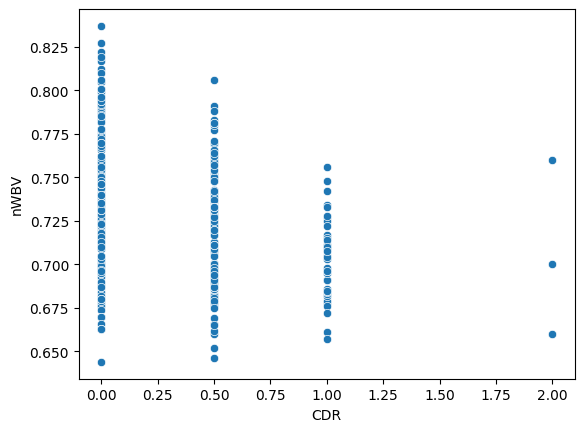

In [ ]:
sns.scatterplot(x="CDR", y="nWBV", data=dementia)

Based on the results of this dataset, there is a high likelihood that people who score below a 25 on the data set, are in a lower SES, and have an nWBV between .750 and .650 are more likely to be diagnosed with dementia.